## Import Library

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBRegressor
import os

## Import Data

### Define the path

In [144]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

### Read the csv

In [145]:
df = pd.read_csv(data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,average_daily_rate
0,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
1,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
2,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
3,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,1.477799e+06
4,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,1.477799e+06


### Separate features and target variable

In [146]:
X = df.drop(columns=['property_name', 'room_id', 'average_daily_rate'])
y = df['average_daily_rate']

### Normalize the features

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the normalized data into training and testing sets

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Create XGBoost Model

In [150]:
# Initialize the XGBoost model
model = XGBRegressor(max_depth=11, n_estimators=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
training_mae = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error on Training: {training_mae}')

testing_mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Testing: {testing_mae}')

Mean Absolute Error on Training: 9499.505091333516
Mean Absolute Error on Testing: 20455.914886023427


### Tuned The Hyperparameter

In [132]:
# # Define the model
# model = XGBRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100],
#     'learning_rate': [0.3, 0.4, 0.5],
#     'max_depth': [7, 8, 9, 10]
# }

# # Set up the Grid Search
# grid_search = GridSearchCV(estimator=model, 
#                            param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', 
#                            cv=5, 
#                            verbose=2, 
#                            n_jobs=-1)

# # Fit the Grid Search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best Parameters: {best_params}')
# print(f'Best Mean Absolute Error: {-best_score}')


In [133]:
# # Define the model
# model = XGBRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 1000, 2000, 5000],
#     'learning_rate': [0.5],
#     'max_depth': [10]
# }

# # Set up the Grid Search
# grid_search = GridSearchCV(estimator=model, 
#                            param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', 
#                            cv=5, 
#                            verbose=2, 
#                            n_jobs=-1)

# # Fit the Grid Search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best Parameters: {best_params}')
# print(f'Best Mean Absolute Error: {-best_score}')

### Cross Validation

In [134]:
# # Define your XGBoost model
# model = XGBRegressor(learning_rate=0.5, max_depth=10, n_estimators=5000, random_state=42)

# # Define the k-fold cross-validation scheme
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Define the scoring function
# scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# # Perform cross-validation and get scores
# cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)

# # Convert negative MAE to positive since we used greater_is_better=False
# cv_scores = -cv_scores

# # Print the cross-validation scores and their mean
# print(f'Cross-Validation MAE Scores: {cv_scores}')
# print(f'Mean Cross-Validation MAE: {np.mean(cv_scores)}')

# # Fit the model on the entire training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_test = model.predict(X_test)

# # Evaluate the model on the test data
# testing_mae = mean_absolute_error(y_test, y_pred_test)
# print(f'Mean Absolute Error on Testing: {testing_mae}')

### Feature Important

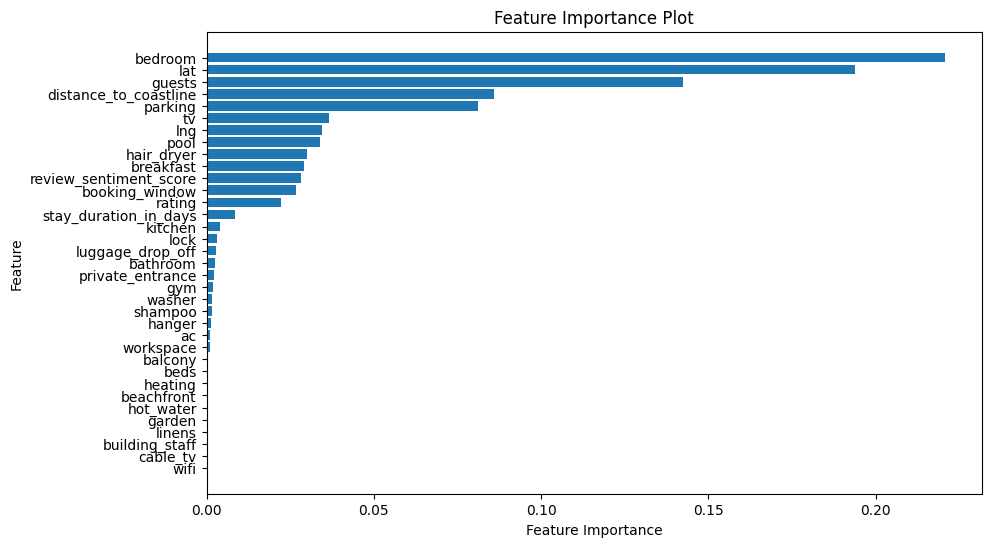

Mean Absolute Error: 20455.914886023427


In [151]:
import matplotlib.pyplot as plt

# Initialize a new XGBoost model with the best hyperparameters
best_model = XGBRegressor(max_depth=11, n_estimators=1000, random_state=42)

# Train the model on the entire training dataset with the best hyperparameters
best_model.fit(X_train, y_train)

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

### Predict with Feature Important 

In [136]:
# important_column = ['bedroom', 'lat', 'guests',
#                     'distance_to_coastline', 'parking',
#                     'tv', 'pool', 'hair_dryer', 'lng',
#                     'booking_window',
#                     'review_sentiment_score',
#                     'breakfast', 'rating',
#                     'stay_duration_in_days', 'kitchen']

# X_important = df[important_column]
# y_important = df['average_daily_rate']

In [137]:
# scaler = StandardScaler()
# X_important_scaled = scaler.fit_transform(X_important)

In [138]:
# X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important_scaled, y_important, test_size=0.2, random_state=42)

In [139]:
# # Initialize the XGBoost model
# model = XGBRegressor(learning_rate=0.5, max_depth=11, n_estimators=1000, random_state=42)

# # Fit the model on the training data
# model.fit(X_important_train, y_important_train)

# # Make predictions on the test data
# y_pred_important_train = model.predict(X_important_train)
# y_pred_important_test = model.predict(X_important_test)

# # Evaluate the model
# training_important_mae = mean_absolute_error(y_important_train, y_pred_important_train)
# print(f'Mean Absolute Error on Training: {training_important_mae}')

# testing_important_mae = mean_absolute_error(y_important_test, y_pred_important_test)
# print(f'Mean Absolute Error on Testing: {testing_important_mae}')

### Convert Model to PKL

In [152]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

### Load and test the model

In [154]:
# Load the trained XGBoost model
xgboost_model = joblib.load('xgboost_model.pkl')

# Use XGBoost model to make predictions
xgboost_predictions_test = xgboost_model.predict(X_test)

# Now you can use these predictions in your TensorFlow code
print(xgboost_predictions_test[:10])

[462076.66 540076.94 360077.47 642335.5  506750.1  559206.75 368131.8
 440053.34 620068.3  620129.56]


In [155]:
import pandas as pd
from datetime import date
import joblib

def get_distinct_properties(df):
    return df.drop_duplicates(subset=['property_name', 'room_id'])

def booking_window(today, check_in):
    return (check_in - today).days

def stay_duration(check_in, check_out):
    return (check_out - check_in).days

def predict(predicted_df, property_name, room_id, check_in, check_out):
    # Select property name dan room_id
    distinct_df = get_distinct_properties(predicted_df)
    
    # Select property name and room_id
    filtered_df = distinct_df[(distinct_df['property_name'] == property_name) & 
                              (distinct_df['room_id'] == room_id)].copy()
    
    if filtered_df.empty:
        raise ValueError("No matching property_name and room_id found in the data")
    
    print(filtered_df['average_daily_rate'])
    # Drop unnecessary columns
    filtered_df.drop(columns=['property_name', 'room_id', 'average_daily_rate'], inplace=True)
    
    # Feature engineering booking window
    today = date.today()
    booking_window_days = booking_window(today, check_in)
    
    # Feature engineering stay duration
    stay_duration_days = stay_duration(check_in, check_out)
    
    # Replace values in columns
    filtered_df['stay_duration_in_days'] = stay_duration_days
    filtered_df['booking_window'] = booking_window_days
    
    print("Filtered DataFrame after replacing values:\n", filtered_df)
    print("Booking window (days):", booking_window_days)
    print("Stay duration (days):", stay_duration_days)
    
    # Predict
    xgboost_model = joblib.load('xgboost_model.pkl')
    xgboost_predictions_test = xgboost_model.predict(filtered_df)
    
    return xgboost_predictions_test

# Example usage
check_in = date(2024, 12, 31)
check_out = date(2025, 1, 1)

prediction = predict(df, 'Bingin Ombak', 431874, check_in, check_out)
print("Prediction:", prediction)

0    1.477799e+06
Name: average_daily_rate, dtype: float64
Filtered DataFrame after replacing values:
    bedroom  bathroom  beds  guests  wifi  tv  cable_tv  ac  workspace  \
0        1         1     1       2     1   0         0   1          1   

   hot_water  ...  shampoo  beachfront  building_staff       lat         lng  \
0          1  ...        1           1               0 -8.805646  115.113378   

   distance_to_coastline  booking_window  stay_duration_in_days  \
0                15.6035             216                      1   

   review_sentiment_score  rating  
0                0.458603     4.0  

[1 rows x 35 columns]
Booking window (days): 216
Stay duration (days): 1
Prediction: [484145.34]
